### 프론트엔드 만들기 전 아래와 같은 데이터 sample을 만듭시다.


|- images  
&nbsp; |- 001.png  
&nbsp; |- 002.png  
&nbsp; |- ...  
|- labels            <-- 원본 Mask  
&nbsp; |- 001.png  
&nbsp; |- 002.png  
&nbsp; |- ...  
|- labels_modified   <-- 수정된 Mask  
&nbsp; |- 001_01.png   
&nbsp; |- 001_02.png  
&nbsp; |- 001_03.png   
&nbsp; |- 002.png   
&nbsp; |- 003.png   

In [43]:
import os
from glob import glob
import requests
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def save_image(url, save_folder='images'):
    "url을 이용해 이미지를 폴더에 차곡차곡 쌓습니다."
    im = Image.open(requests.get(url, stream=True).raw)
    plt.imshow(im)
    
    num_image=len(os.listdir(save_folder))
    save_path = os.path.join(save_folder, f'{(num_image+1):>03}'+'.jpg')
    print('save... to', save_path) # 001.jpg 꼴로 저장
    im.save(save_path)

In [5]:
def del_last_image(save_folder):
    "폴더의 마지막 이미지를 삭제합니다."
    num_image=len(os.listdir(save_folder))
    
    last_image=os.path.join(save_folder, os.listdir('images')[-1])
    os.remove(last_image)
    
    print('remove... -> ', last_image )
    
    
    

## 마음에 드는 이미지를 찾아서 저장해봅시다.

save... to images/001.jpg


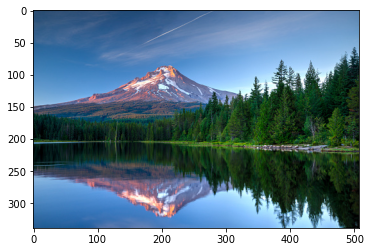

In [22]:
save_image('https://media.istockphoto.com/photos/mount-hood-oregon-picture-id1268487061?b=1&k=20&m=1268487061&s=170667a&w=0&h=3fHYwaImlqUETcjCnSV7YO2-PzCFvaX6VSQaiGfWqpc='
          , 'images')

save... to images/007.jpg


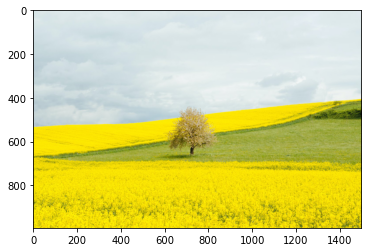

In [57]:
save_image(url='https://i0.wp.com/digital-photography-school.com/wp-content/uploads/2021/03/landscape-photography-tips-9.jpg?resize=1500%2C994&ssl=1')

# 이미지 폴더를 이용해 Segmentation mask folder 만들기

In [ ]:
#!python segment_jsp.py multi --config-path configs/cocostuff164k.yaml 
# --model-path data/models/coco/deeplabv2_resnet101_msc-cocostuff164k-100000.pth 
# --image-folder images --crf --cpu

# 비교

In [31]:
round(7/2)

4

In [128]:
def plot_pair(image_path, label_path):
    "이미지와 라벨을 비교합시다."
    row=len(os.listdir(image_path))
    
    image_paths=glob(os.path.join(image_path, '*'))
    label_paths=glob(os.path.join(label_path, '*'))
    
    plt.figure(figsize=(12, row*2))
    for idx in range(row):
        
        plt.subplot(round(row/2), 4, 2*idx+1)
        plt.title(f"Image({image_paths[idx].split('/')[-1]})")
        plt.imshow(plt.imread(image_paths[idx]))
        plt.axis('off')
        plt.subplot(round(row/2), 4, 2*idx+2)
        plt.title('Label')
        plt.imshow(plt.imread(label_paths[idx]))
        plt.axis('off')
    plt.tight_layout()
    

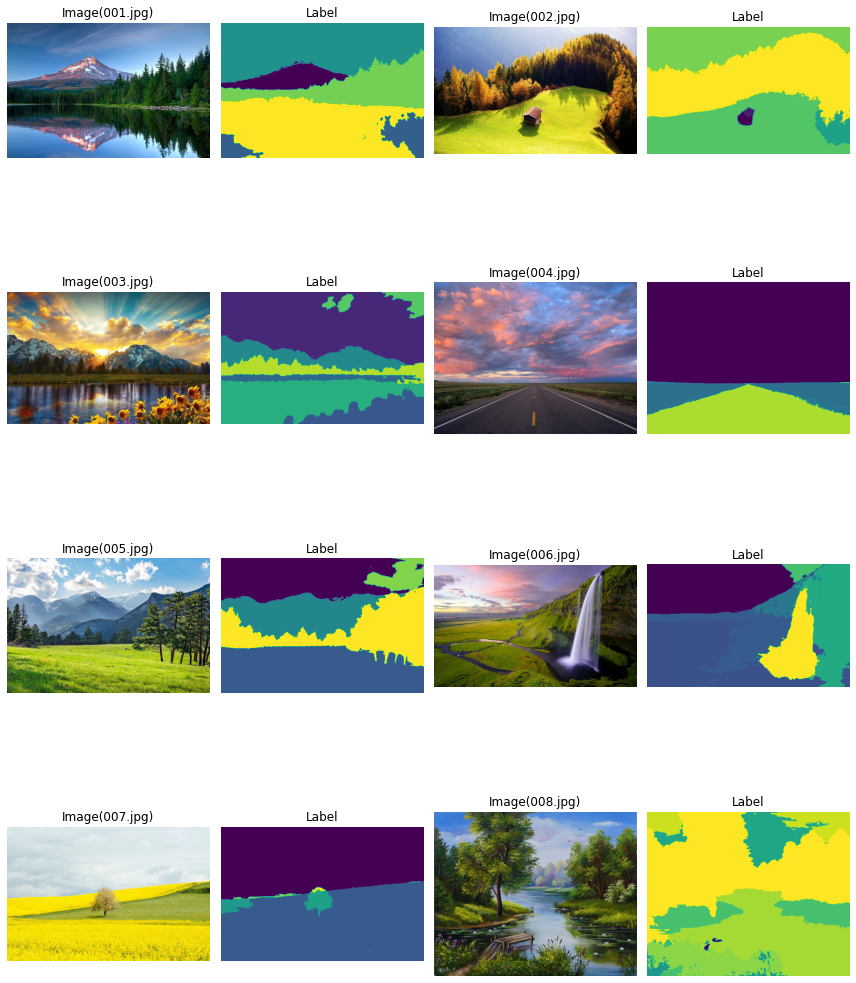

In [94]:
plot_pair('images', 'labels')

> not bad

In [75]:
url='https://i.pinimg.com/736x/02/84/f4/0284f4972ed4949b0368967b66803b8f.jpg'

In [76]:
im = Image.open(requests.get(url, stream=True).raw)

save... to images/008.jpg


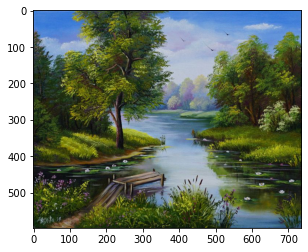

In [78]:
save_image(url=url)

# Label 확인

In [51]:
from omegaconf import OmegaConf
def get_classtable(CONFIG):
    with open(CONFIG.DATASET.LABELS) as f:
        classes = {}
        for label in f:
            label = label.rstrip().split("\t")
            classes[int(label[0])] = label[1].split(",")[0]
    return classes

In [69]:
def tell_classes(label_folder, classes):
    
    label_paths=glob(os.path.join('labels', '*'))
    
    for label_path in label_paths:
        labelmap=plt.imread(label_path)
        labelmap=(labelmap*255).astype(np.uint8)
        labels=np.unique(labelmap)
        
        print('In ', label_path.split('/')[-1])
        print([{label:classes[label]} for label in labels])
    
    

In [70]:
config_path='configs/cocostuff164k.yaml'
CONFIG=OmegaConf.load(config_path)
classes=get_classtable(CONFIG)

In [71]:
tell_classes('labels', classes)

In  001.png
[{134: 'mountain'}, {147: 'river'}, {156: 'sky-other'}, {168: 'tree'}, {177: 'water-other'}]
In  002.png
[{0: 'person'}, {8: 'boat'}, {10: 'fire hydrant'}, {14: 'bench'}, {96: 'bush'}, {123: 'grass'}, {134: 'mountain'}, {156: 'sky-other'}, {168: 'tree'}]
In  003.png
[{96: 'bush'}, {105: 'clouds'}, {118: 'flower'}, {123: 'grass'}, {134: 'mountain'}, {147: 'river'}, {156: 'sky-other'}, {168: 'tree'}, {177: 'water-other'}]
In  004.png
[{105: 'clouds'}, {123: 'grass'}, {124: 'gravel'}, {126: 'hill'}, {148: 'road'}, {154: 'sea'}]
In  005.png
[{105: 'clouds'}, {123: 'grass'}, {134: 'mountain'}, {156: 'sky-other'}, {168: 'tree'}]
In  006.png
[{105: 'clouds'}, {123: 'grass'}, {126: 'hill'}, {134: 'mountain'}, {149: 'rock'}, {156: 'sky-other'}, {177: 'water-other'}]
In  007.png
[{105: 'clouds'}, {123: 'grass'}, {139: 'pavement'}, {141: 'plant-other'}, {156: 'sky-other'}, {168: 'tree'}]
In  008.png
[{14: 'bench'}, {96: 'bush'}, {105: 'clouds'}, {118: 'flower'}, {123: 'grass'}, {141: 